In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image

from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import cv2
import random

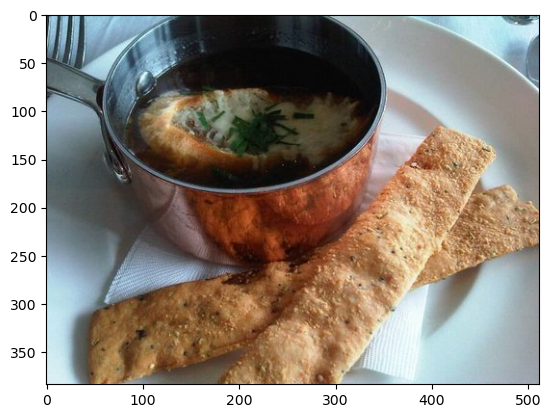

In [2]:
plt.imshow(image.load_img('Dataset/training/food/0.jpg'))

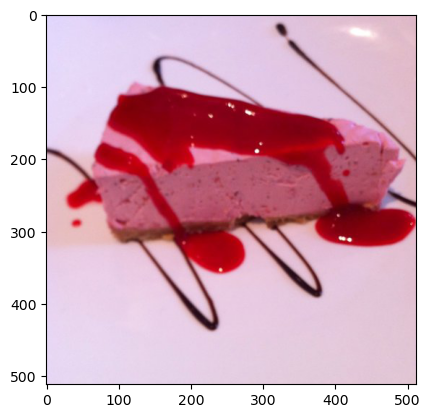

In [3]:
plt.imshow(image.load_img('Dataset/training/food/12.jpg'))

In [4]:
train_data='Dataset/training'
valid_data='Dataset/validation'

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
image_files = glob(os.path.join(train_data+ '/*/*.jpg'))
valid_images = glob(os.path.join(valid_data+ '/*/*.jpg'))

In [7]:
folders=glob(train_data+'/*')
folders

['Dataset/training\\food', 'Dataset/training\\non_food']

In [8]:
K=len(folders)

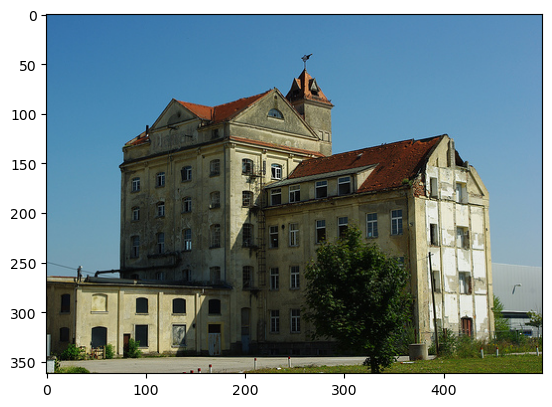

In [9]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [10]:
ptm=PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False
    )

In [11]:
ptm.trainable=False

In [12]:
data_agumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [13]:
i=Input(shape=IMAGE_SIZE+[3])
x=preprocess_input(i)
x=data_agumentation(x)
x=ptm(x) 
x=Flatten()(x)
x=Dense(K, activation='softmax')(x)
model=Model(inputs=i, outputs=x)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   

In [15]:
batch_size=128

train_ds=tf.keras.utils.image_dataset_from_directory(
    train_data,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)

val_ds=tf.keras.utils.image_dataset_from_directory(
    valid_data,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)


Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
AUTOTUNE=tf.data.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
r=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 333s 14s/step - accuracy: 0.8910 - loss: 3.7936 - val_accuracy: 0.9800 - val_loss: 0.3917
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 334s 14s/step - accuracy: 0.9747 - loss: 0.7142 - val_accuracy: 0.9830 - val_loss: 0.3284
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 371s 14s/step - accuracy: 0.9847 - loss: 0.2697 - val_accuracy: 0.9820 - val_loss: 0.3283
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 351s 15s/step - accuracy: 0.9877 - loss: 0.2099 - val_accuracy: 0.9840 - val_loss: 0.3660
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 345s 14s/step - accuracy: 0.9880 - loss: 0.1932 - val_accuracy: 0.9840 - val_loss: 0.3039
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 867s 37s/step - accuracy: 0.9883 - loss: 0.2426 - val_accuracy: 0.9760 - val_loss: 0.4986
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 392s 16s/step - accuracy: 0.9930 - loss: 0.1022 - val_accuracy: 0.9770 - val_loss: 0.6065
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 282s 12s/step - accuracy: 0.9933 - loss: 0.1334 - val_accuracy: 0.

In [ ]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()